# Case Classification with BERT

Applying BERT to the problem of multiclass text classification. Our dataset consists of messages. Each dialog utterance/message is labeled with one of the two emotion categories: normal or attenion. 

## Workflow: 
1. Import Data
2. Data preprocessing and downloading BERT
3. Training and validation
4. Saving the model


👋  **Let's start** 

In [19]:
from google.colab import drive
drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# install ktrain on Google Colab
!pip3 install ktrain
!pip3 install sklearn

In [21]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

##Data preprocess to train and test

In [30]:
data_df = pd.read_excel("//content//drive//My Drive//Data/nlpdata//case description with labelV4.xlsx")

data_df.head()

,Case Number,case,label
0,1.0,Wrong key given for main gate.,normal
1,2.0,window latch broke at master and common bedroom,normal
2,3.0,Window Grille request,normal
3,4.0,WC seat defective.,normal
4,5.0,WC seat defective,normal


In [23]:
df_train=data_df[["label","case"]]
df_train.head()

,label,case
0,normal,Wrong key given for main gate.
1,normal,window latch broke at master and common bedroom
2,normal,Window Grille request
3,normal,WC seat defective.
4,normal,WC seat defective


In [24]:
df_train.groupby("label").size()

label
attention    126
normal       312
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True)

train.to_csv("//content//drive//My Drive//Data/nlpdata//gen_data//data_train.csv",index=False)
test.to_csv("//content//drive//My Drive//Data/nlpdata////gen_data/data_test.csv",index=False)

In [31]:
df = pd.read_csv("//content//drive//My Drive//Data/nlpdata////gen_data/data_test.csv")
df.groupby("label").size()

label
attention    30
normal       58
dtype: int64

In [29]:
df = pd.read_csv("//content//drive//My Drive//Data/nlpdata//gen_data//data_train.csv")
df.groupby("label").size()

label
attention     96
normal       254
dtype: int64

##Train using BERT

In [ ]:
data_train = pd.read_csv(data_dir_path+'gen_data/data_train.csv', encoding='utf-8')
data_test = pd.read_csv(data_dir_path+'gen_data/data_test.csv', encoding='utf-8')


X_train = data_train.case.tolist()
X_test = data_test.case.tolist()

y_train = data_train.label.tolist()
y_test = data_test.label.tolist()

print(y_train[0])
# data = data_train.append(data_test, ignore_index=True)

# class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

# print('size of training set: %s' % (len(data_train['Text'])))
# print('size of validation set: %s' % (len(data_test['Text'])))
# print(data.Emotion.value_counts())

# data.head(10)


normal


In [ ]:
encoding = {
    'normal': 0,
    'attention': 1,
}
# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]


In [ ]:
class_names = ['normal', 'attention']
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=500, 
                                                                       max_features=40000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=4)

In [ ]:
learner.fit_onecycle(5e-5, 5)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/5
88/88 [==============================] - 136s 1s/step - loss: 0.5260 - accuracy: 0.7486 - val_loss: 0.3740 - val_accuracy: 0.8750
Epoch 2/5
88/88 [==============================] - 115s 1s/step - loss: 0.3417 - accuracy: 0.8686 - val_loss: 0.2361 - val_accuracy: 0.8864
Epoch 3/5
88/88 [==============================] - 115s 1s/step - loss: 0.2815 - accuracy: 0.8943 - val_loss: 0.2675 - val_accuracy: 0.8977
Epoch 4/5
88/88 [==============================] - 116s 1s/step - loss: 0.1128 - accuracy: 0.9657 - val_loss: 0.1735 - val_accuracy: 0.9432
Epoch 5/5
88/88 [==============================] - 116s 1s/step - loss: 0.0295 - accuracy: 0.9943 - val_loss: 0.1788 - val_accuracy: 0.9545


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
88/88 [==============================] - 108s 1s/step - loss: 0.8690 - accuracy: 0.3114
Epoch 2/1024
88/88 [==============================] - 107s 1s/step - loss: 0.6699 - accuracy: 0.6286
Epoch 3/1024
88/88 [==============================] - 107s 1s/step - loss: 0.5497 - accuracy: 0.7457
Epoch 4/1024
88/88 [==============================] - 109s 1s/step - loss: 0.4388 - accuracy: 0.8400
Epoch 5/1024
88/88 [==============================] - 110s 1s/step - loss: 0.3696 - accuracy: 0.8657
Epoch 6/1024
88/88 [==============================] - 111s 1s/step - loss: 0.2842 - accuracy: 0.8943
Epoch 7/1024
88/88 [==============================] - 111s 1s/step - loss: 0.2798 - accuracy: 0.8829
Epoch 8/1024
88/88 [==============================] - 111s 1s/step - loss: 0.2056 - accuracy: 0.9400
Epoch 9/1024
88/88 [==============================] - 111s 1s/step - loss: 0.6114 - accuracy: 0.7229
Epoch 10

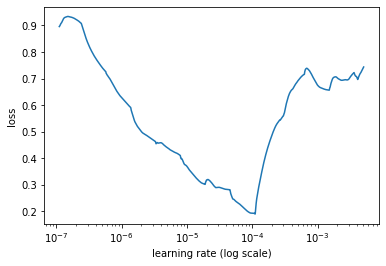

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['normal', 'attention']

In [ ]:
import time 

# message = 'if the problem cannot resolve it is very dangerous to the residents , i have report  3 month ago' #attention
# message="Incident Location: 716 XXX DR 70 #10-136  XXX0716) Incident Location Description:  Mr Loke enquire how long can a unit do renovation, his neighbor below #09-136 started before CNY and drilling noise can still be heard now. He wish to indicate that the renovation noise is not from his unit, one of his neighbor approached his unit to check. He enquire if anyone else feedback and when will it stop. Please assist, thank you.."
# message="The window grill is loose not able to fasten, it can drop downstair. It is very dangerous for my child at home. Please assist me asap " # attention
# message=" Request make many times to the office but no one reponse to me. I call to office noone answer!" #attention
# message="Ceiling leaking, need help to repair. Reported"#attenion
# message="Incident Location: 720 XXX AVE 6 #12-616  XXX0720) Incident Location Description:  Feedback the clg leaks at master toilet.  Refer to EE for assistance and return call. thanks" #normal
# message="Incident Location: 727 XXX CIRCLE #06-106  XXX0727) Incident Location Description:  Onwer had book eappt on 10/3 at 8.30am with regards his ceiling leaking at the kitchen toilet. Request HDB officer to check and rectified the issue as soon as possible before the leaking become more worse. Inform him that with route his feedback to the EEIC to follow up with him and he does not need to come down to BO. He noted. EEic for your follow up with owner." #normal
# message=" Request make more two week. No feedback from office!" #attention
# message="There are persistence noise of renovation affect my work. Call the office to report case since 2 weeks ago. There is an urgent response required" #attention
# message="There are burning smoke around my block for a few week. I have report 2 weeks ago . Please help to assist to investigate." #attention
# message="Put up request for repair more than 3 weeks but no feedback" #attention
# message="Feedback on defects. Thanks.   1. toilet door handle broke when the door slammed due to the strong wind today. The handle was already loose before it broke.  2. The toilet tap spoilt."#normal 
# message="there are many crack line at the ceiling. I need you urgent attention!" #attention
# message="Incident Location: 783C XXX RISE #13-09  XXX3783) Incident Location Description:  From: Bei Er ONG (HDB)  ONG_Bei_Er_hdb.gov.sg  Sent: Wednesday, 7 April 2021 12:40 PM To: Marpuah KAWI (HDB)  Marpuah_KAWI_hdb.gov.sg Cc: Angelia MH LIM (HDB)  Angelia_MH_LIM_hdb.gov.sg Subject: FW: Master bedroom ceiling light water leakage HDB ref. no.: 91524919216 Address: BLK 783C XXX RISE # 13 - 09 XXX3783)Hi Marpuah Please create CMS for Angelia. Thanks! Regards Bei Er Ong Bei " #normal
# message="I am totally angery about the last repair that you contractor had done. Pls call me back immediately"  #attention
# message="there still crack line even the contractor have repaired. I urgently need the room. Pls reply asap."  #attention
# message= "This urgent call me immediately" #attention
# message="Incident Location: 10 XXX DR 12 #01-14  XXX0717) Incident Location Description:  Mdm P called n informed she has reported on cctv installed _ the window area for the abv flat. Nothing has been done, reported 2 years ago. She also called during CNY. She req to know if they are authorized to install the cctv. Pls assist to return her call. Thank-u." #attention
# message="Incident Location: 740 XXX CIRCLE #03-419  XXX0740) Incident Location Description:  Dear Team, I would like to seek assistance for the installation of 2 toilet exhaust fans. Kindly provide me with the correct channel to seek the answer for this. Thank you and appreciate your kind reply. " #normal
# message="Incident Location: 715 XXX DR 70 #07-144  XXX0715) Incident Location Description:  Mr Mohamad feedback on ceiling leak _ mbrt recurring case. Appreciate if EEIC can follow up with him pls. Thank you." #attention
# message=" This is the recurring water pipe leaking. There many repair but it is still happening. Please help." #attention
# message=" The water pipe near my unit walkway is leaking. There many repair but it is still happening. Please help." #attention
# message=" The water pipe near my unit walkway is leaking. Please help." #normal
message="My ceiling crack"
labels = ['normal', 'attention']
# start_time = time.time() 
# prediction = predictor.predict(message,return_proba=True)
# pred_text = labels[np.argmax(prediction)]
# confidence = prediction[0][np.argmax(prediction)]
# print(pred_text)
# print(confidence)
# print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

start_time = time.time() 
print(predictor.get_classes())
prediction = predictor.predict(message,return_proba=True)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(prediction)], (time.time() - start_time)))

['normal', 'attention']
predicted: [0.99842775 0.00157229] (0.20)
predicted: normal (0.20 seconds)


In [ ]:
predictor.save(data_dir_path+"models/bert_modelv4")

In [ ]:
import ktrain


# reload the predictor
predictor = ktrain.load_predictor(data_dir_path+'models/bert_modelv4')



In [ ]:
import time 
class_names = ['normal', 'attention']
message = 'Incident Location: 783C XXX RISE #13-09  XXX3783) if the problem cannot resolve it is very dangerous to the residents , i have report  3 month ago' #attention
# message="Incident Location: 716 XXX DR 70 #10-136  XXX0716) Incident Location Description:  Mr Loke enquire how long can a unit do renovation, his neighbor below #09-136 started before CNY and drilling noise can still be heard now. He wish to indicate that the renovation noise is not from his unit, one of his neighbor approached his unit to check. He enquire if anyone else feedback and when will it stop. Please assist, thank you.."
# message="The window grill is loose not able to fasten, it can drop downstair. It is very dangerous for my child at home. Please assist me asap " # attention
# message=" Request make many times to the office but no one reponse to me. I call to office noone answer!" #attention
# message="Ceiling leaking, need help to repair. Reported"#attenion
# message="Ceiling leaking, need help to repair. Resend"#attenion
# message="Incident Location: 720 XXX AVE 6 #12-616  XXX0720) Incident Location Description:  Feedback the clg leaks at master toilet.  Refer to EE for assistance and return call. thanks" #normal
# message="Incident Location: 727 XXX CIRCLE #06-106  XXX0727) Incident Location Description:  Onwer had book eappt on 10/3 at 8.30am with regards his ceiling leaking at the kitchen toilet. Request HDB officer to check and rectified the issue as soon as possible before the leaking become more worse. Inform him that with route his feedback to the EEIC to follow up with him and he does not need to come down to BO. He noted. EEic for your follow up with owner." #normal
# message=" Request make more two week. No feedback from office!" #attention
# message="There are persistence noise of renovation affect my work. Call the office to report case since 2 weeks ago. There is an urgent response required" #attention
# message="There are burning smoke around my block for a few week. I have report 2 weeks ago . Please help to assist to investigate." #attention
# message="Put up request for repair more than 3 weeks but no feedback" #attention
# message="Feedback on defects. Thanks.   1. toilet door handle broke when the door slammed due to the strong wind today. The handle was already loose before it broke.  2. The toilet tap spoilt."#normal 
# message="there are many crack line at the ceiling. I need you urgent attention!" #attention
# message="Incident Location: 783C XXX RISE #13-09  XXX3783) Incident Location Description:  From: Bei Er ONG (HDB)  ONG_Bei_Er_hdb.gov.sg  Sent: Wednesday, 7 April 2021 12:40 PM To: Marpuah KAWI (HDB)  Marpuah_KAWI_hdb.gov.sg Cc: Angelia MH LIM (HDB)  Angelia_MH_LIM_hdb.gov.sg Subject: FW: Master bedroom ceiling light water leakage HDB ref. no.: 91524919216 Address: BLK 783C XXX RISE # 13 - 09 XXX3783)Hi Marpuah Please create CMS for Angelia. Thanks! Regards Bei Er Ong Bei "
# message="I totally disappoint with the services." # attention
# message="I am unhappy about the repair done in my ceiling. Not up to standard! "
# message=" The water pipe near my unit walkway is leaking. Please help." #normal
# message="feedback of defectives 3 weeks ago "
# message="Incident Location: 783C XXX RISE #13-09  XXX3783) his a repeat case.Incident Location Description:  From: Bei Er ONG (HDB)  ONG_Bei_Er_hdb.gov.sg  Sent: Wednesday, 7 April 2021 12:40 PM To: Marpuah KAWI (HDB)  Marpuah_KAWI_hdb.gov.sg Cc: Angelia MH LIM (HDB)  Angelia_MH_LIM_hdb.gov.sg Subject: FW: Master bedroom ceiling light water leakage HDB ref. no.: 91524919216 Address: BLK 783C XXX RISE # 13 - 09 XXX3783).This a repeat case.Hi Marpuah Please create CMS for Angelia .Thanks! Regards Bei Er Ong Bei "
message="pls help urgent"
start_time = time.time() 
print(predictor.get_classes())
prediction = predictor.predict(message,return_proba=True)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(prediction)], (time.time() - start_time)))

['normal', 'attention']
predicted: [0.99038225 0.00961772] (0.09)
predicted: normal (0.09 seconds)


In [ ]:
import time 
class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']
message=["I suffered a work-related injury in XXXX and am now permanently XXXX. My income has dropped substantially in the past 5 years and I am now on a low fixed income. On XXXX separate occasions from XXXX to XXXX I had zero income and had to use my Sams Club card to purchase food, thus running up debt out of necessity. I am currently in the process of attempting to pay down my Sams Club ( Synchrony Bank ) card, and stopped using the card some time ago. I have always made at least minimum payments and have never missed a payment. Despite this, my interest rate has been unilaterally raised three times in the past two years, and is now at 23.15 %. I called a Sams Club account rep today to file a complaint over the phone, because I am never going to be able to pay down this card when I am paying almost {$50.00} a month in interest and can only afford to pay the minimum payment + {$4.00} or {$5.00} dollars. They would not work with me, which I expected. In my opinion, Synchrony Bank is taking unfair advantage of recent interest rate hikes to gouge customers, especially those who are financially unable to make substantial monthly payments on their accounts. Therefore I am contacting the CFPB to file a complaint through which I might receive some relief."]
# message = 'I just broke up with my boyfriend'
#sadness
# message = ['Worst service I had ever seen']

#anger
# message = ['Cannot even get simple job done !']


#anger
# message = ['Very upset help fix ceiling leak badly !']

#sadness
# message = ['I total disappoint to the service!']

#neutral
# message = ['fix ceiling leak  !']

# message = ['delivery was hour late and my pizza was cold!']
start_time = time.time() 
print(predictor.get_classes())
prediction = predictor.predict(message,return_proba=True)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(prediction)], (time.time() - start_time)))

['joy', 'sadness', 'fear', 'anger', 'neutral']
predicted: [[4.6633915e-05 4.5350329e-03 7.9407269e-05 9.9519289e-01 1.4616631e-04]] (7.19)
predicted: anger (7.19 seconds)


Done! to reload the predictor use: ktrain.load_predictor

In [ ]:
data_df = pd.read_excel(data_dir_path+"data/case description training data.xlsx")
data_df.head()

,Case Number,Case Description
0,1,Wrong key given for main gate.
1,2,window latch broke at master and common bedroom
2,3,Window Grille request
3,4,WC seat defective.
4,5,WC seat defective


In [ ]:
df = data_df[['Case Description']]
df.head()

,Case Description
0,Wrong key given for main gate.
1,window latch broke at master and common bedroom
2,Window Grille request
3,WC seat defective.
4,WC seat defective


In [ ]:
data_result={"case":[], "label":[]}

result_df= pd.DataFrame.from_dict(data_result)
# case=''
# label=''
# dict_row={"case":case,"label":label}
# result_df=result_df.append(dict_row,ignore_index=True)
result_df.head()

,case,label


In [ ]:
class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']
for index, row in df.iterrows():
  print(row['Case Description'])
  prediction = predictor.predict(row['Case Description'],return_proba=True)
  print(class_names[np.argmax(prediction)])
  case=row['Case Description']
  label=class_names[np.argmax(prediction)]
  dict_row={"case":case,"label":label}
  result_df=result_df.append(dict_row,ignore_index=True)

 

Wrong key given for main gate. 
anger
window latch broke at master and common bedroom
fear
Window Grille request
anger
WC seat defective.
anger
WC seat defective
anger
Water stains outside CT
fear
Water stain marks on master bedroom toilet ceiling. 
anger
water seepage at master bedroom wall
anger
water marks on wall outside CT
fear
water marks on wall outside Common toilet, causing internal  socket to be wet
fear
water keak at wall between kitchen and service yard. suspect concealed pipe.
fear
water dripping at service yard ceiling
fear
Wall seepage at master toilet during heavy rain
fear
wall seepage after rain
fear
Town Council would like to have BIG comments to provide awning/shelters to the high beams where the My Skool is located. Especially during rainy days, it is inconvenience to parents when they have to pick up their kids from the My first skool. Please refer to the attachment.
anger
Toilet Louvered window panel clip loose. 
anger
Toilet Bifold door faulty
anger
Tile pointin

In [ ]:
result_df.head()
result_df.to_csv(data_dir_path+"hdbdata.csv")